# Import Library

In [226]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Import other libraries if needed
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.base import BaseEstimator, TransformerMixin
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Import Dataset

In [227]:
train_set = pd.read_csv('train_set.csv')

In [228]:
val_set = pd.read_csv('val_set.csv')

In [229]:
train_set.head(7)

,id,URLLength,DomainLength,IsDomainIP,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,226786.0,25.000000,17.0,0.0,1.000000,0.522907,0.065153,3.0,1.0,0.0,...,0.0,0.0,1.0,1.0,6.0,7.0,35.0,1.0,17.0,1.0
1,163910.0,34.000000,26.0,0.0,1.000000,0.522907,0.057792,3.0,1.0,0.0,...,1.0,0.0,0.0,40.0,4.0,10.0,105.0,0.0,27.0,1.0
2,113381.0,27.218001,29.0,0.0,0.987694,0.079963,0.057663,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,163038.0,25.000000,17.0,0.0,1.000000,0.522907,0.067413,3.0,1.0,0.0,...,1.0,0.0,1.0,26.0,1.0,12.0,232.0,0.0,35.0,1.0
4,117472.0,20.000000,12.0,0.0,1.000000,0.079963,0.061459,3.0,1.0,0.0,...,1.0,0.0,1.0,25.0,1.0,18.0,33.0,1.0,4.0,1.0
5,93450.0,24.000000,16.0,0.0,1.000000,0.522907,0.062538,3.0,1.0,0.0,...,0.0,0.0,0.0,27.0,1.0,10.0,8.0,4.0,3.0,1.0
6,199627.0,35.000000,27.0,0.0,1.000000,0.522907,0.051936,3.0,1.0,0.0,...,0.0,0.0,1.0,17.0,4.0,10.0,0.0,0.0,145.0,1.0


In [230]:
val_set.head(7)

,id,URLLength,DomainLength,IsDomainIP,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,14951.0,31.0,23.0,0.0,1.0,0.522907,0.062753,3.0,1.0,0.0,...,0.0,0.0,1.0,3.0,13.000000,12.0,89.0,0.000000,27.0,1.0
1,38319.0,27.0,19.0,0.0,1.0,0.079963,0.071288,3.0,1.0,0.0,...,0.0,0.0,1.0,6.0,11.000000,17.0,126.0,2.000000,126.0,1.0
2,171787.0,30.0,22.0,0.0,1.0,0.522907,0.071271,3.0,1.0,0.0,...,0.0,0.0,1.0,15.0,1.000000,11.0,113.0,1.000000,40.0,1.0
3,137088.0,22.0,14.0,0.0,1.0,0.522907,0.064515,3.0,1.0,0.0,...,0.0,0.0,1.0,42.0,6.000000,12.0,109.0,0.000000,120.0,1.0
4,66115.0,27.0,19.0,0.0,1.0,0.522907,0.063795,3.0,1.0,0.0,...,0.0,0.0,1.0,29.0,5.000000,14.0,121.0,0.000000,132.0,1.0
5,32892.0,28.0,20.0,0.0,1.0,0.005616,0.060816,2.0,1.0,0.0,...,0.0,0.0,1.0,47.0,7.260422,38.0,96.0,1.137975,23.0,1.0
6,179253.0,29.0,21.0,0.0,1.0,0.522907,0.065225,3.0,1.0,0.0,...,1.0,0.0,0.0,30.0,1.000000,4.0,49.0,0.000000,24.0,1.0


# Imbalancing

In [231]:
# Plot class distribution
def plot_classes(y):
    plt.title("Class distribution")
    plt.pie(x=y.value_counts(), autopct='%.2f', labels=["0", "1"])

    print(y.value_counts())
    print()

label
1.0    71828
0.0     5800
Name: count, dtype: int64



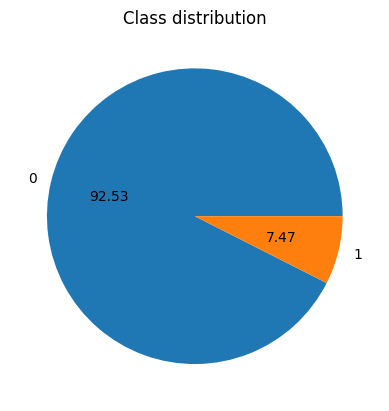

In [232]:
plot_classes(train_set['label'])

In [233]:
from imblearn.over_sampling import SMOTE

def balance_classes(X_t, y_t):
    sm = SMOTE(random_state=42)
    X_t_res, y_t_res = sm.fit_resample(X_t, y_t)
    return X_t_res, y_t_res

In [234]:
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class PCATransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.pca = PCA(n_components=self.n_components)
        self.num_columns = None
        self.pca_columns = None

    def fit(self, X, y=None):
        # Identify numerical columns
        numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

        # Filter for continuous columns (unique values > 2)
        self.num_columns = [col for col in numerical_cols if X[col].nunique() > 2]

        # Fit PCA on the selected numerical columns
        self.pca.fit(X[self.num_columns])

        # Create column names for PCA components
        self.pca_columns = [f'PCA_{i+1}' for i in range(self.pca.n_components_)]
        return self

    def transform(self, X):
        """
        Apply PCA transformation to the selected columns and return the modified DataFrame.
        """
        X_transformed = X.copy()

        # Apply PCA to the selected numerical columns
        pca_result = self.pca.transform(X[self.num_columns])

        # Create a DataFrame for PCA components
        pca_df = pd.DataFrame(pca_result, columns=self.pca_columns, index=X.index)

        # Drop the original numerical columns and concatenate PCA components
        X_transformed = X_transformed.drop(columns=self.num_columns, errors='ignore')
        X_transformed = pd.concat([X_transformed, pca_df], axis=1)

        return X_transformed

In [235]:
FEATURES_TO_DROP2 = [
'NoOfLettersInURL',
'DomainLength',
'DomainTitleMatchScore',
'CharContinuationRate',
'TLDLength',
'TLDLegitimateProb',
"NoOfSubDomain",
'NoOfObfuscatedChar',
"ObfuscationRatio",
'NoOfDegitsInURL',
'DegitRatioInURL',
'NoOfEqualsInURL',
'NoOfQMarkInURL',
'NoOfAmpersandInURL',
'NoOfPopUp'
]

In [236]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def __init__(self, features_to_drop):
        self.features_to_drop = features_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Drop the specified features
        X_dropped = X.drop(columns=self.features_to_drop, errors='ignore')
        return X_dropped

In [237]:
class FeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = RobustScaler()
        self.num_columns = None  # Placeholder for numerical columns
        self.url_title_column = 'URLTitleMatchScore'

    def fit(self, X, y=None):
        # Identify numerical columns excluding the 'URLTitleMatchScore' column and columns with nunique=2
        self.num_columns = [
            col for col in X.select_dtypes(include=['int64', 'float64']).columns
            if col != self.url_title_column and X[col].nunique() > 2
        ]

        # Fit the RobustScaler to the numerical columns
        self.scaler.fit(X[self.num_columns])
        return self

    def transform(self, X):
        # Copy the DataFrame to avoid modifying the original
        X_transformed = X.copy()

        # Apply RobustScaler to the numerical columns
        if self.num_columns:  # Ensure there are columns to scale
            X_transformed[self.num_columns] = self.scaler.transform(X[self.num_columns])

        # Apply Log Transformation to 'URLTitleMatchScore'
        if self.url_title_column in X_transformed.columns:
            X_transformed[self.url_title_column] = X_transformed[self.url_title_column].apply(
                lambda x: np.log1p(x) if pd.notna(x) and x >= 0 else np.nan
            )

        return X_transformed

In [238]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import RobustScaler
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline

# Note: You can add or delete preprocessing components from this pipeline

pipe = Pipeline([#("pca", PCATransformer()),
                ("dropper",FeatureDropper(FEATURES_TO_DROP2)),
                 ("scaler", FeatureScaler()),
])

train_set = pipe.fit_transform(train_set)
val_set = pipe.transform(val_set)

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [239]:
def match_columns(train, test):
    # Get list of columns in training set
    train_cols = train.columns.tolist()

    # Get list of columns in test set
    test_cols = test.columns.tolist()

    # Remove any columns in test set that aren't in training set
    for col in test_cols:
        if col not in train_cols:
            test = test.drop(col, axis=1)

    # Add any missing columns to test set and fill with 0
    for col in train_cols:
        if col not in test_cols:
            test[col] = 0

    # Reorder columns in test set to match training set
    test = test[train_cols]

    # Return modified test set
    return test

In [240]:
# Match the columns
val_set = match_columns(train_set, val_set)

In [241]:
val_set.shape

(19289, 37)

In [242]:
train_set.shape

(77628, 37)

In [243]:
train_set.columns = train_set.columns.str.strip()

In [244]:
X_train = train_set.drop(['label'], axis=1)
y_train = train_set['label']

X_val = val_set.drop(['label'], axis=1)
y_val = val_set['label']

In [245]:
# List of features to apply the threshold condition
threshold_features = [
    "IsDomainIP", "HasObfuscation", "IsHTTPS", "HasTitle", "HasFavicon",
    "Robots", "IsResponsive", "HasDescription", "HasExternalFormSubmit",
    "HasSocialNet", "HasSubmitButton", "HasHiddenFields", "HasPasswordField",
    "Bank", "Pay", "Crypto", "HasCopyrightInfo"
]

# Apply the threshold condition: > 0.5 -> 1, <= 0.5 -> 0
X_train[threshold_features] = X_train[threshold_features].applymap(lambda x: 1 if x > 0.5 else 0)

# Display the transformed X_train
print(X_train[threshold_features].head())

<ipython-input-245-b15145d22b46>:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train[threshold_features] = X_train[threshold_features].applymap(lambda x: 1 if x > 0.5 else 0)


   IsDomainIP  HasObfuscation  IsHTTPS  HasTitle  HasFavicon  Robots  \
0           0               0        1         1           1       0   
1           0               0        1         1           1       0   
2           0               0        1         1           0       0   
3           0               0        1         1           1       0   
4           0               0        1         0           1       0   

   IsResponsive  HasDescription  HasExternalFormSubmit  HasSocialNet  \
0             1               1                      0             1   
1             1               1                      0             1   
2             1               0                      0             0   
3             1               1                      0             1   
4             1               1                      0             1   

   HasSubmitButton  HasHiddenFields  HasPasswordField  Bank  Pay  Crypto  \
0                1                1                 0     

In [246]:
# Perform resampling
X_train, y_train = balance_classes(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [247]:
column_count = X_train.shape[1]  # Number of columns in the DataFrame
# OR
column_count = len(X_train.columns)  # Alternative way to get the column count
print(column_count)

36


In [248]:
# Assuming FEATURES_TO_DROP2 is a list of column names to be dropped
val_set = val_set.drop(columns=FEATURES_TO_DROP2, errors='ignore')

In [249]:
X_test = pd.read_csv('test2.csv')

In [250]:
X_test.drop(columns=['id'],inplace=True)
X_train.drop(columns=['id'],inplace=True)
val_set.drop(columns=['id'],inplace=True)

# Coba dulu

In [251]:
# Step 1: Separate features and labels
# X_train = train_set.drop(columns=['id', 'label'])  # Drop non-feature columns
# y_train = train_set['label']

# X_val = val_set.drop(columns=['id', 'label'])
# y_val = val_set['label']


In [252]:
# Step 2: Scale numerical features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)

In [253]:
# Convert scaled numpy array back to DataFrame
# X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# # If you also want to reset the index to match the original dataset
# X_train_scaled_df.reset_index(drop=True, inplace=True)

# # Display the DataFrame
# X_train_scaled_df.head()


In [254]:
# Step 3: Train Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [255]:
# Ensure 'label' column exists in val_set
if 'label' in val_set.columns:
    # Split val_set into features (val_set_x) and target (val_set_y)
    val_set_x = val_set.drop(columns=['label'])  # Features (all columns except 'label')
    val_set_y = val_set['label']                # Target variable (the 'label' column)
else:
    raise ValueError("The 'label' column is not present in val_set.")

# Display the results for verification
print("Features (val_set_x):")
print(val_set_x.head())
print("\nTarget (val_set_y):")
print(val_set_y.head())


Features (val_set_x):
   URLLength  IsDomainIP  URLCharProb  HasObfuscation  LetterRatioInURL  \
0   0.666667         0.0     0.320114             0.0          0.619090   
1   0.000000         0.0     1.388618             0.0          0.122794   
2   0.500000         0.0     1.386475             0.0          0.507979   
3  -0.833333         0.0     0.540648             0.0         -0.758687   
4   0.000000         0.0     0.450494             0.0          0.122794   

   NoOfOtherSpecialCharsInURL  SpacialCharRatioInURL  IsHTTPS  LineOfCode  \
0                         0.0              -0.714286        1   -0.293413   
1                         0.0              -0.357143        1   -0.308383   
2                         0.0              -0.642857        1   -0.549900   
3                         0.0               0.357143        1   -0.200599   
4                         0.0              -0.357143        1    0.305389   

   LargestLineLength  ...  Bank  Pay  Crypto  HasCopyrightInfo  

In [256]:
# Step 4: Predict and Evaluate on Validation Set
y_pred = model.predict(val_set_x)

In [257]:
# Metrics
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Confusion Matrix:
 [[ 1268   177]
 [   81 17763]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.88      0.91      1445
         1.0       0.99      1.00      0.99     17844

    accuracy                           0.99     19289
   macro avg       0.97      0.94      0.95     19289
weighted avg       0.99      0.99      0.99     19289



# Predict

In [258]:
X_train.shape

(143656, 35)

In [259]:
X_test.shape

(10000, 35)

In [260]:
y_pred = model.predict(X_test)

In [261]:
# submission = pd.DataFrame({'id': test['id'], 'label': y_pred})


# submission.to_csv('ricky.csv', index=False)

# submission.head()

In [262]:
# proportions = submission['label'].value_counts(normalize=True)

# # Plot proportions as a pie chart
# plt.figure(figsize=(6, 6))
# proportions.plot(kind='pie',
#                  autopct='%1.1f%%',
#                  colors=['skyblue', 'salmon'],
#                  startangle=90,
#                  explode=(0.1, 0))  # Slightly explode the first slice
# plt.title("Proportion of Labels in Submission")
# plt.ylabel('')  # Hide y-axis label
# plt.show()

# From Scratch

In [263]:
class NaiveBayes:
    def __init__(self):
        self.X_train = None
        self.y_train = None
        self.attack_cat = None
        self.prior = {}
        self.mean = {}
        self.variance = {}

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

        self.attack_cat = np.unique(y)

        # Calculate prior probabilities
        self.prior = {cat: np.sum(y == cat) / len(y) for cat in self.attack_cat}

        # Calculate mean and variance for each feature and category
        for cat in self.attack_cat:
            indices = np.where(y == cat)[0]
            self.mean[cat] = np.mean(self.X_train[indices], axis=0)
            self.variance[cat] = np.var(self.X_train[indices], axis=0)

        return self

    # Gaussian Probability Density Function
    def gaussian_pdf(self, x, mean, var):
        eps = 1e-9  # smoothing term to avoid divide by zero
        coeff = 1.0 / np.sqrt(2.0 * np.pi * (var + eps))
        exponent = -((x - mean) ** 2) / (2.0 * (var + eps))
        return coeff * np.exp(exponent)

    def predict(self, X):
        X = np.array(X)

        # Ensure the columns of X match the training set
        if X.shape[1] != self.X_train.shape[1]:
            raise ValueError("The feature dimensions of X and X_train do not match.")

        y_pred = []
        for x in X:
            posterior = {}
            for cat in self.attack_cat:
                # Start with log of prior probability
                posterior[cat] = np.log(self.prior[cat])
                # Add log likelihoods for each feature
                for i in range(self.X_train.shape[1]):
                    pdf_value = self.gaussian_pdf(x[i], self.mean[cat][i], self.variance[cat][i])
                    posterior[cat] += np.log(pdf_value + 1e-9)  # Add eps to avoid log(0)
            # Append the category with the highest posterior probability
            y_pred.append(max(posterior, key=posterior.get))

        return np.array(y_pred)

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == np.array(y))

In [264]:
# Step 3: Train Gaussian Naive Bayes
model2 = NaiveBayes()
model2.fit(X_train, y_train)

In [265]:
# Step 4: Predict and Evaluate on Validation Set
y_pred = model2.predict(val_set_x)

In [266]:
# Metrics
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Confusion Matrix:
 [[ 1248   197]
 [   44 17800]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.86      0.91      1445
         1.0       0.99      1.00      0.99     17844

    accuracy                           0.99     19289
   macro avg       0.98      0.93      0.95     19289
weighted avg       0.99      0.99      0.99     19289



In [267]:
y_pred2 = model2.predict(X_test)

In [268]:
test = pd.read_csv('test.csv')

In [269]:
submission2 = pd.DataFrame({'id': test['id'], 'label': y_pred2})


submission2.to_csv('semoga.csv', index=False)

submission2.head()

,id,label
0,48,1.0
1,68,0.0
2,76,1.0
3,155,1.0
4,167,1.0


In [270]:
def plot_distribution(y):
    plt.title("Class distribution")
    plt.pie(x=y.value_counts(), autopct='%.2f', labels=["0", "1"])

    print(y.value_counts())

label
1.0    5918
0.0    4082
Name: count, dtype: int64


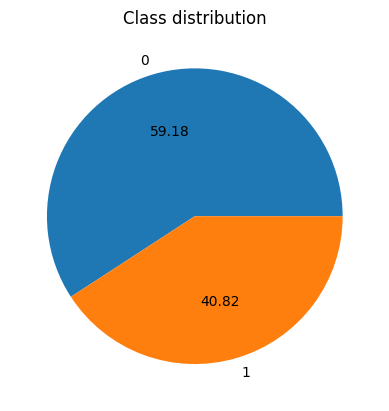

In [271]:
plot_distribution(submission2['label'])

In [272]:
X_train.head(3)

,URLLength,IsDomainIP,URLCharProb,HasObfuscation,LetterRatioInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,-0.333333,0,0.620501,0,-0.188317,0.0,-0.071429,1,0.442116,1.011493,...,0,0,0,1,-0.846154,0.00,-0.461538,-0.386364,0.888153,-0.333333
1,1.166667,0,-0.301101,0,0.907979,0.0,-0.928571,1,1.454092,1.868518,...,0,1,0,0,0.653846,-0.25,-0.230769,0.409091,0.000000,-0.181818
2,0.036333,0,-0.317243,0,1.819090,1.0,0.208022,1,-1.010978,-0.342591,...,0,0,0,0,-0.884615,-0.75,-1.000000,-0.784091,0.000000,-0.575758
